In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Aviation Accident Capstone:
## *Part III: Logistic Regression Model*
Created by: Katy Christensen <br>
Created on: September 26, 2022 <br>
Created for: BrainStation Data Science Bootcamp Capstone<br>
Notebook 3 of 6<br>

Previous Notebook: *Part II: Pre-Processing & Dummy Variables* <br>
Upcoming Notebook: *Part IV: Decision Tree Model*

--------------
 ## Overview
 This is the first notebook where a model is applied. Logistic regressions are a classic supervised model and statistical model. Logistic models are senstive to collinearity, which is unfortuante since a collinearity test could not be run on the features. There was an effort to circumvent this issue by using Principal Component Analysis (PCA) which minimizes data dimensionality while trying to maintain variance, this will be discussed slightly more in-depth later. 
#### Methodology:
1. Load the data and verify there are no issues with it. 
2. Once the data is loaded and checked, the data is split two times. Once into a train-test split, where 70% of the data is allocated to the training data and a second train-validation dataset, where 80% of the remaining training data is split into a smaller training set. 
3. A baseline model is applied, where no hyperparameters are changed on the secondary train data and tested against the validation set. 
4. Data transformation is accomplished by scaling data and using PCA. A logistic model is run again on the transformed data to determine if it improves the accuracy. 
5. Model tuning, or hyperparameter optimization, is the follow on step in which limits are placed into how the model is run. 
6. Once the model parameters and hyperparameters are finalized, the model is tested against the validation set and then applied to the final test dataset. 
7. A model evaluation can be peformed here, however for this project I chose to only evaulate the final selected model in the final notebook *Capstone Part VI*. 
---

## Table of Contents
[1. Load Data & Review](#Step-1) <br>
- [Load Data](#Step-1) <br>
- [Data Balance](#data-balance) <br>

[2. Splitting Data](#Step-2) <br>
- [Train-Test Split](#test-split) <br>
- [Train-Validation Split](#val-split)<br>

[3. Baseline Logistic Regression ](#Step-3) <br>
- [Coefficient Analysis](#coef) <br>

[4. Transform Data](#Step-4)<br>
- [Scale Data](#scaling) <br>
- [Apply PCA](#pca)<br>

[5. Hyperparamater Optimization](#Step-5)<br>
[6. Test Model](#Step-5)<br>
[7. Results & Summary](#Step-5)<br>

--------
<a id='Step-1'></a>
## 1. Load Data & Review
--------
### Load Data

In [2]:
ntsb08 = pd.read_csv('data/ntsb08_model.csv')

In [3]:
X = ntsb08.drop(columns='ev_highest_injury')
y = ntsb08['ev_highest_injury']

<a id='data-balance'></a>
### Data Balance

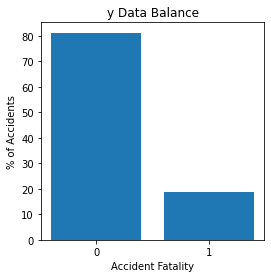

Train Class imbalance: [0.81 0.19]


In [4]:
values, counts = np.unique(y, return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure(figsize=(4,4))
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts

#Format training data bar chart
plt.title('y Data Balance')
plt.xlabel('Accident Fatality')
plt.ylabel('% of Accidents')
plt.show()

print(f"Train Class imbalance: {np.round(normalized_counts, 2)}")

**Comment:** This data is considered imbalanced since 81% of the accidents in the dataset are non-fatal. Imbalanced data causes concerns because it can change model performance. For now the data will remain imbalanced, but this is useful to make sure the class ratio is staying the same when splliting the data.

------------
<a id='Step-2'></a>
## 2. Splitting the Data
------------
Splitting data is a technique we use to guard against overfitting. The model is initially fit on the training data and then evaluated against the test data. This helps create a model which can be used to make predictions on unseen data. The test data represents this potential new data and anticpate model performance on it. 
<a id='test-split'></a>
### Train-Test Split
A 70/30 split was used for all initial train-test splits in this project. The dataset was also stratified to ensure representative sampling.

In [5]:
#Split the test into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

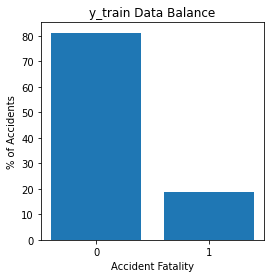

Train Class imbalance: [0.81 0.19]


In [6]:
values_train, counts_train = np.unique(y_train, return_counts=True)
normalized_counts_train = counts_train/counts_train.sum()

plt.figure(figsize=(4,4))
plt.bar(["0", "1"], normalized_counts_train*100) # plot normalized counts

#Format training data bar chart
plt.title('y_train Data Balance')
plt.xlabel('Accident Fatality')
plt.ylabel('% of Accidents')
labels = ['Non-Fatal', 'Fatal']

plt.show()

print(f"Train Class imbalance: {np.round(normalized_counts_train, 2)}")

<a id='val-split'></a>
### Train-Validation Split
Similar to the train-test split, the validation data provides data to evaluate the model as the model is optimized. It also helps guard against data leakage, which occurs when data from the test set "leaks" into the training data and causes overfitting. 

An 80/20 split was used for all train-validation splits.

In [7]:
#Split the test into train (80%) and test (20%)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=2, stratify=y_train)

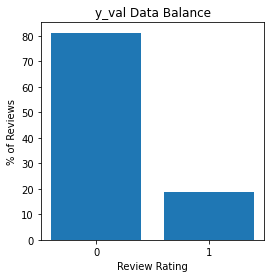

Train Class imbalance: [0.81 0.19]


In [8]:
values_val, counts_val = np.unique(y_val, return_counts=True)
normalized_counts_val = counts_val/counts_val.sum()

plt.figure(figsize=(4,4))
plt.bar(["0", "1"], normalized_counts_train*100) # plot normalized counts

#Format training data bar chart
plt.title('y_val Data Balance')
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Train Class imbalance: {np.round(normalized_counts_val, 2)}")

----
<a id='Step-3'></a>
## 3. Baseline Logistic Regression
----
This is first application of logistic regression to the data and get a better undrestanding of the coefficients. 

In [9]:
# Fitting the logistic model
LR_model = LogisticRegression()
LR_model.fit(X_train2, y_train2)

# Evaluate its classification accuracy (Just on the training set for now)
print(f"Train Set Accuracy: {LR_model.score(X_train2, y_train2)}")
print(f"Test Set Accuracy: {LR_model.score(X_val, y_val)}")

Train Set Accuracy: 0.8117850084894369
Test Set Accuracy: 0.8114005789356491


**Comment:** This looks good for an initial test. However, beause the data is imbalanced the accuracy score mirrors the percentage of non-fatal accidents.The good news is the model isn't overfitting. 
Next the coefficient values are examined by creating a dataframe and appending the coefficients to the feature names. 

<a id='coef'></a>
### Coefficient Analysis 

In [10]:
feature_names = pd.DataFrame(ntsb08.columns, columns=['Features'])
log_coef = pd.DataFrame(np.transpose(LR_model.coef_), columns = ['Coefficients'])
coefficients = pd.concat([feature_names, log_coef], axis=1)
coefficients = coefficients.set_index(coefficients.columns[0])
coefficients.sort_values(by='Coefficients', ascending=False).head()

,Coefficients
Features,
wx_cond_basic,0.003031
med_crtf_vldty,0.001196
phase_flt_spec,0.000989
wind_dir_deg,0.000308
ev_month,0.000266


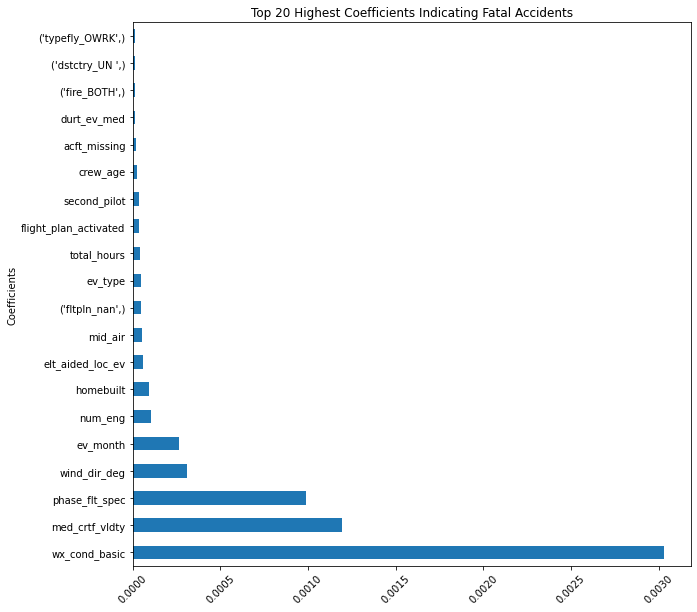

In [11]:
#Visualize 
coefficients.sort_values(by='Coefficients', ascending=False).head(20).plot(kind="barh", figsize=(10, 10),
                                                                           legend=False)
plt.title("Top 20 Highest Coefficients Indicating Fatal Accidents")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show() #increase chance of crash

**Comment:** From the bar graph, the coefficients themselves are very low; even for the highest indicators of fatal/non-fatal accidents. The factors increasing the likelihood of a fatal accident are:
1. The basic weather conditions (instrument conditions, visual conditions, )
2. If the pilot was in posession of a valid medical certificate
3. The phase of flight
4. Wind direction 
5. Month the event took place

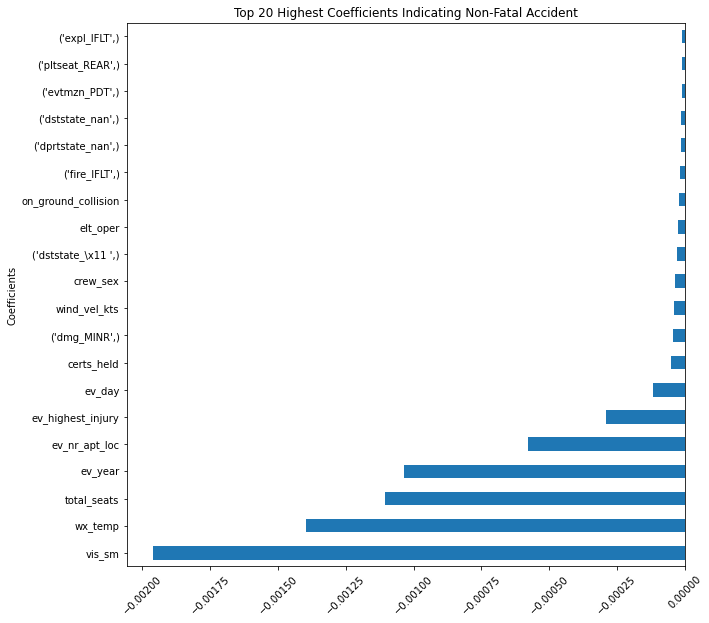

In [12]:
coefficients.sort_values(by='Coefficients', ascending=True).head(20).plot(kind="barh", 
                        figsize=(10, 10), legend=False)
plt.title("Top 20 Highest Coefficients Indicating Non-Fatal Accident")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

**Comment:** From the bar graph, the coefficients themselves are very low; even for the highest indicators of fatal/non-fatal accidents. The factors increasing the likelihood of a non-fatal accident are:
1. Visibility (sm)
2. Temperature
3. Number of seats
4. Year of the event
5. Occured on or Off airport 

---
<a id='Step-4'></a>
## 4. Transform Data
----
<a id='scaling'></a>
### Scaling
While a majority of the features were categorical and binarized, some of the features are dates, weights, and distances meaning they are on substantially different scales. Scaling normalizes the range of the features so the model considers them on the same scale. The common scalers are the StandardScaler and the MinMaxScaler. MinMax scales everything between 0 and 1, and is not appropriate for this dataset. The StandardScaler is the only scaler used in this project. 

In [13]:
#instantiate scaler
scaler = StandardScaler()
#fit scaler
scaler.fit(X_train2)

#scale data
X_scale = scaler.transform(X_train2)
X_sval = scaler.transform(X_val)

#### Refit Model on Scaled Data

In [14]:
#Logistic Regresstion on Scaled Data
LR_scale = LogisticRegression(random_state=7)

#Fit to PCA data
LR_scale.fit(X_scale, y_train2)

# Evaluate its classification accuracy
print(f"Train Set Accuracy: {LR_scale.score(X_scale, y_train2)}")
print(f"Test Set Accuracy: {LR_model.score(X_sval, y_val)}")

Train Set Accuracy: 0.9616166114621315
Test Set Accuracy: 0.6429525718102872


**Comment:** The model is overfitting by a substantial amount and is indicated by the very high accuracy score on the training data set and the 30% lower accuracy score on the validation data. 

<a id='pca'></a>
### Principal Component Analysis (PCA)
PCA reduces the dimensionality of the dataset and is applied after the data is scaled. PCA is optimized through n_components, or the number of principal components features are condensed down to. PCA helps with collinearity issue in this project, but it is unclear how features or which features are used or grouped together. 

In [15]:
# Instantiate & fit PCA model to data
# Default n_components will generate the same number of PCs as you have features 
PCA1 = PCA()
PCA1.fit(X_scale)

# transform data 
X_train_PCA = PCA1.transform(X_scale)
X_val_PCA = PCA1.transform(X_sval)

In [16]:
print('X_train2 Shape:', X_train2.shape)
print('X_train_PCA Shape:', X_train_PCA.shape)

X_train2 Shape: (35927, 10472)
X_train_PCA Shape: (35927, 10472)


**Comment:** The default PCA will use the same number of PCs as the number of features. This is reflected in the same dataframe shape. 

#### Refit Model with Initial PCA Transformation

In [17]:
# Instantiate
LR_PCA = LogisticRegression()

# Fit
LR_PCA.fit(X_train_PCA, y_train2)

# Score 
print(f"Train Set Accuracy: {LR_PCA.score(X_train_PCA, y_train2)}")
print(f"Test Set Accuracy: {LR_PCA.score(X_val_PCA, y_val)}")

Train Set Accuracy: 0.9616166114621315
Test Set Accuracy: 0.9172790024493431


**Comment:** However, despite the lack of shape change the accuracy is greatly improved. With a 5% higher accuracy rate on the training data, it is overfitting but not by a lot.

#### PCA Transformation for 90% of Variance

In [18]:
# Lets say we want to keep 90% of the variance
PCA2 = PCA(n_components = 0.9, random_state=5)
PCA2.fit(X_train2)

# Transform train and test
X_train_PCA2 = PCA2.transform(X_train2)
X_test_PCA2 = PCA2.transform(X_val)

In [19]:
print(f'Original: {X_train2.shape}')
print(f'PCA Transformed: {X_train_PCA2.shape}')

Original: (35927, 10472)
PCA Transformed: (35927, 2)


**Comment:** here the PCs were set to obtain a 90% variance rate. From the transformed dataset shape, 90% of the variance was captured in two PCs. 

#### Refit Model with Secondary PCA Transformation

In [20]:
# Instantiate
LR_PCA = LogisticRegression()

# Fit
LR_PCA.fit(X_train_PCA2, y_train2)

# Score 
print(f"Train Set Accuracy: {LR_PCA.score(X_train_PCA2, y_train2)}")
print(f"Test Set Accuracy: {LR_PCA.score(X_test_PCA2, y_val)}")

Train Set Accuracy: 0.8119520138057729
Test Set Accuracy: 0.8119572478289914


**Comment:** The train and test scores are almost identical. This performance is also similar to the baseline model applied to the original data. So while the performance is not poor, it did not improve either. 

--------
<a id='Step-5'></a>
## 5. Hyperparameter Optimization
--------
Hyperparameters are values set before fitting the data and remain unchanged after fitting the model. These are model regularization parameters within the models, such as the C value in a logistic regression. For this model pipeline, a logistic regression was evaluated on the use of a scalar, different C values, penalties 

In [21]:
#we give our estimators as a list of tuples: name:function.
estimators = [('normalize', StandardScaler()),
             ('dim_reducer', PCA()),
             ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = [
    {
        'model': [LogisticRegression()],
        'normalize': [StandardScaler(), None],
        'dim_reducer': [PCA()],
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l1', 'l2'],
        'dim_reducer__n_components': [4, 5, 6]
    }
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train2, y_train2)

In [22]:
fittedgrid.best_params_

{'dim_reducer': PCA(n_components=4),
 'dim_reducer__n_components': 4,
 'model': LogisticRegression(C=0.01),
 'model__C': 0.01,
 'model__penalty': 'l2',
 'normalize': StandardScaler()}

##### Apply Best Parameters from the GridSearch

In [23]:
# Instantiate & fit PCA model to data
# Default n_components will generate the same number of PCs as you have features 
PCA5 = PCA(n_components = 5, random_state=5)
PCA5.fit(X_scale)

# transform data 
X_train_PCA5 = PCA5.transform(X_scale)
X_val_PCA5 = PCA5.transform(X_sval)

# Instantiate logistic regression
LR_PCA5 = LogisticRegression(penalty='l2', C=1, random_state=5)

# Fit
LR_PCA5.fit(X_train_PCA5, y_train2)

# Score 
print(f"Train Set Accuracy: {LR_PCA5.score(X_train_PCA5, y_train2)}")
print(f"Test Set Accuracy: {LR_PCA5.score(X_val_PCA5, y_val)}")

Train Set Accuracy: 0.8119520138057729
Test Set Accuracy: 0.8119572478289914


**Comment:** After optimizing the hyperparameters, there is a substantial increase in from using only the PCA transformed data. There is an improvement from the baseline performance of approximately 81% to an accuracy of 87%. The accuracy scores between the training and validation dataset are relatively close so there is no over or underfitting. 

##### Refit Optimized Model without PCA

In [24]:
# Instantiate
logreg = LogisticRegression(penalty='l2', C=0.01, random_state=7)

# Fit
logreg.fit(X_scale, y_train2)

# Score 
print(f"Train Set Accuracy: {logreg.score(X_scale, y_train2)}")
print(f"Test Set Accuracy: {logreg.score(X_sval, y_val)}")

Train Set Accuracy: 0.9608094190998413
Test Set Accuracy: 0.9359830772656424


**Comment:** Although running an optimized logistic regression without a PCA transformation a higher accuracry, the model is also overfitting. The optimized logistic regression with a PCA transformation should be used. 

--------
<a id='Step-6'></a>
## 6. Test Model
--------
The optimized model with the best results is applied to the full training data and the test data. 
1. Scale test and train data
2. Apply a PCA(n_components=5)
4. Run a logistic regression with a L2 penality and C=1
5. Evaluate results

##### WIth PCA transformation

In [25]:
#instantiate scaler
scaler = StandardScaler()
#fit scaler
scaler.fit(X_train)

#scale data
X_scale_full = scaler.transform(X_train)
X_scale_test = scaler.transform(X_test)

# Instantiate & fit PCA model to data
# Default n_components will generate the same number of PCs as you have features 
PCA_final = PCA(n_components = 5, random_state=5)
PCA_final.fit(X_scale)

# transform data 
X_train_PCA = PCA_final.transform(X_scale_full)
X_test_PCA = PCA5.transform(X_scale_test)

# Instantiate
logreg_final = LogisticRegression(penalty='l2', C=1, random_state=5)

# Fit
logreg_final.fit(X_train_PCA, y_train)

# Score 
print(f"Train Set Accuracy: {logreg_final.score(X_train_PCA, y_train)}")
print(f"Test Set Accuracy: {LR_PCA5.score(X_test_PCA, y_test)}")

Train Set Accuracy: 0.811953060633726
Test Set Accuracy: 0.8119706967319582


##### Without PCA transformation

In [27]:
#Instantiate
logreg = LogisticRegression(penalty='l2', C=1, random_state=7)

# Fit
logreg.fit(X_scale_full, y_train)

# Score 
print(f"Train Set Accuracy: {logreg.score(X_scale_full, y_train)}")
print(f"Test Set Accuracy: {logreg.score(X_scale_test, y_test)}")

Train Set Accuracy: 0.9598076109465808
Test Set Accuracy: 0.923624460954954


**Comment:** The results with a PCA transformation are essentially the same as running the base logistic regression model on the original data. There is an improvement without the use of the PCA transformed data although it should be noted that collinearity could be skewing the results

---
<a id='Results'></a>
## 7. Results & Summary 
---
In this portion of the project, the first classification model was used. A logistic regression was applied to the original data, transformed data, and then optimized for improved performance. While there was improved performance at various stages in the process, the final results were essentially the same. A second model was run that did not include a PCA transformation and it performed the best with some mild overfitting. The recommendation is proceed without a PCA transformation when running a logistic regression and maintain similar hyperparameters. 

Model evaluation will only be completed on the final model in Part VI of the capstone project

---
#### <div align = "right">Up Next:</div>
<div align = "right">Aviation Accident Captson Part IV: Decision Tree Model</div>